# Patents

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Patents.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1985,Grants of patents (number),397580,NaN,World Intellectual Property Organization (WIPO...
1,1,"Total, all countries or areas",1995,Grants of patents (number),430500,NaN,World Intellectual Property Organization (WIPO...
2,1,"Total, all countries or areas",2005,Grants of patents (number),633100,NaN,World Intellectual Property Organization (WIPO...
3,1,"Total, all countries or areas",2010,Grants of patents (number),914900,NaN,World Intellectual Property Organization (WIPO...
4,1,"Total, all countries or areas",2017,Grants of patents (number),1397900,NaN,World Intellectual Property Organization (WIPO...
...,...,...,...,...,...,...,...
1909,894,Zambia,2019,Patents in force (number),7726,NaN,World Intellectual Property Organization (WIPO...
1910,716,Zimbabwe,1985,Resident patent filings (per million population),4,NaN,World Intellectual Property Organization (WIPO...
1911,716,Zimbabwe,1995,Resident patent filings (per million population),5,NaN,World Intellectual Property Organization (WIPO...
1912,716,Zimbabwe,1985,Grants of patents (number),212,NaN,World Intellectual Property Organization (WIPO...


In [5]:
df.shape

(1914, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  1914 non-null   int64 
 1   Unnamed: 1           1914 non-null   object
 2   Year                 1914 non-null   int64 
 3   Series               1914 non-null   object
 4   Value                1914 non-null   int64 
 5   Footnotes            19 non-null     object
 6   Source               1914 non-null   object
dtypes: int64(3), object(4)
memory usage: 104.8+ KB


In [7]:
df.rename(
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1985,Grants of patents (number),397580,NaN,World Intellectual Property Organization (WIPO...
1,1,"Total, all countries or areas",1995,Grants of patents (number),430500,NaN,World Intellectual Property Organization (WIPO...
2,1,"Total, all countries or areas",2005,Grants of patents (number),633100,NaN,World Intellectual Property Organization (WIPO...
3,1,"Total, all countries or areas",2010,Grants of patents (number),914900,NaN,World Intellectual Property Organization (WIPO...
4,1,"Total, all countries or areas",2017,Grants of patents (number),1397900,NaN,World Intellectual Property Organization (WIPO...


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Value']]
df1.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1985,Grants of patents (number),397580
1,1,"Total, all countries or areas",1995,Grants of patents (number),430500
2,1,"Total, all countries or areas",2005,Grants of patents (number),633100
3,1,"Total, all countries or areas",2010,Grants of patents (number),914900
4,1,"Total, all countries or areas",2017,Grants of patents (number),1397900


In [9]:
df1.shape

(1914, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Code                 1914 non-null   int64 
 1   Region/Country/Area  1914 non-null   object
 2   Year                 1914 non-null   int64 
 3   Series               1914 non-null   object
 4   Value                1914 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 74.9+ KB


In [11]:
df1.describe(include='object')

,Region/Country/Area,Series
count,1914,1914
unique,168,3
top,Germany,Grants of patents (number)
freq,19,766


In [12]:
df1['Region/Country/Area'].value_counts()

Germany                     19
India                       19
Portugal                    19
Spain                       19
Singapore                   19
                            ..
Sierra Leone                 1
Fiji                         1
Central African Republic     1
Chad                         1
Eswatini                     1
Name: Region/Country/Area, Length: 168, dtype: int64

In [13]:
df1['Series'].value_counts()

Grants of patents (number)                          766
Resident patent filings (per million population)    702
Patents in force (number)                           446
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

276    19
356    19
620    19
724    19
702    19
       ..
694     1
242     1
140     1
148     1
748     1
Name: Code, Length: 168, dtype: int64

# Data Cleaning

In [15]:
df1['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d’Ivoire"}, inplace=True)

df1['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa',
       'Latin America & the Caribbean', 'Asia', 'Europe', 'Oceania',
       'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Congo', 'Costa Rica',
       'Côte d’Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Dem. People's Rep. Korea", 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghan

In [16]:
df1['Year'].value_counts().head()

2018    353
2017    352
2019    333
2010    279
2005    259
Name: Year, dtype: int64

In [17]:
df1['Value'].describe()

count    1.914000e+03
mean     3.805811e+04
std      2.134029e+05
min      1.000000e+00
25%      2.125000e+01
50%      2.055000e+02
75%      2.262500e+03
max      3.131427e+06
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

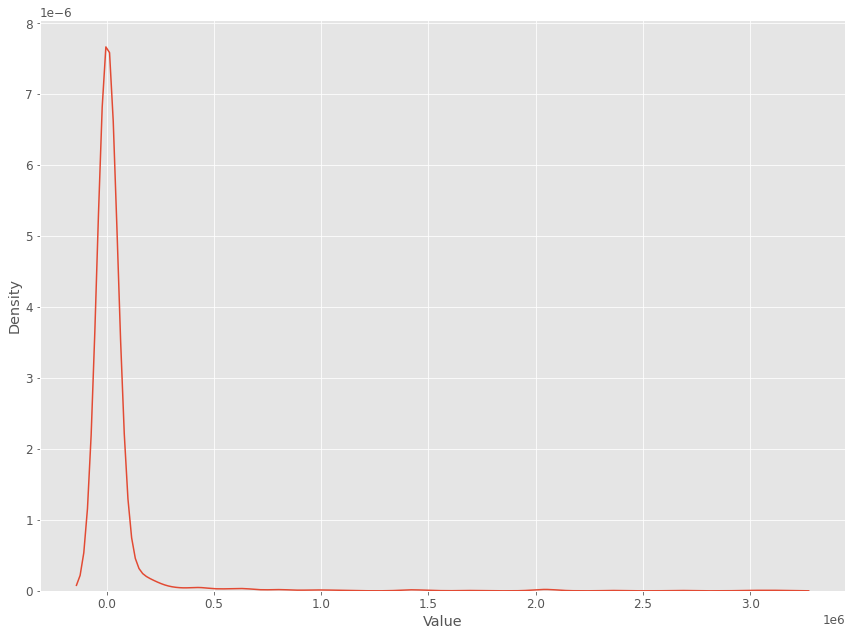

In [18]:
sns.kdeplot(data=df1, x='Value')

# Missing Values Exploration

In [19]:
df1.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [20]:
df1_gprd = df1.groupby(['Region/Country/Area', 'Series'])
df1_gprd.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1985,Grants of patents (number),397580
1,1,"Total, all countries or areas",1995,Grants of patents (number),430500
2,1,"Total, all countries or areas",2005,Grants of patents (number),633100
3,1,"Total, all countries or areas",2010,Grants of patents (number),914900
4,1,"Total, all countries or areas",2017,Grants of patents (number),1397900
...,...,...,...,...,...
1909,894,Zambia,2019,Patents in force (number),7726
1910,716,Zimbabwe,1985,Resident patent filings (per million population),4
1911,716,Zimbabwe,1995,Resident patent filings (per million population),5
1912,716,Zimbabwe,1985,Grants of patents (number),212


# Data Visualization

In [21]:
from matplotlib.ticker import FuncFormatter

# helper function for formatting y-axis
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# bar plot helper function
def plot_line(data, x, y, ci=None, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar charts
    sns.lineplot(
        data=data,
        x=x, y=y, 
        ci=ci, hue=hue,
        size=size, style=style, 
        ax=ax)

    # label plots axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # format y-axis
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line

# Grants of patents exploration

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

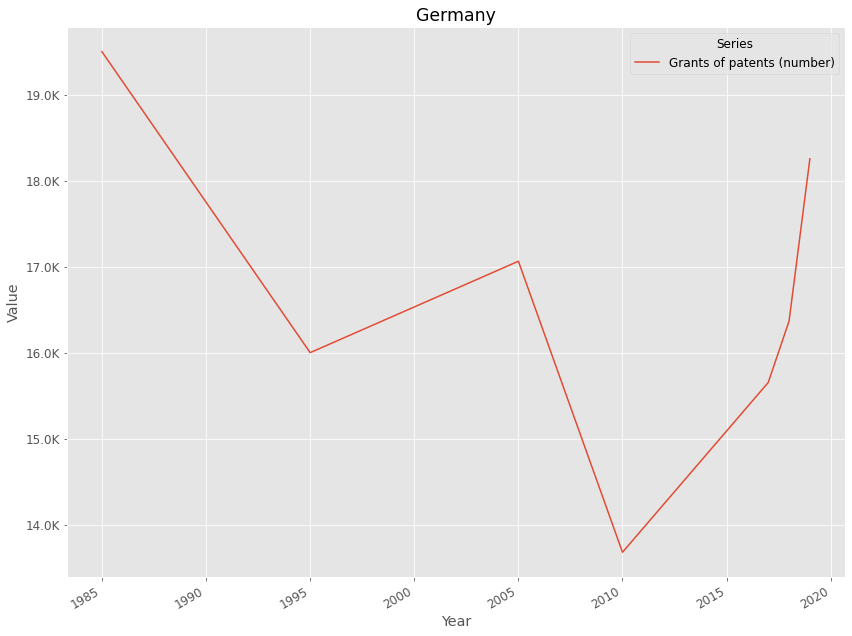

In [22]:
plot_line(
    data=df1_gprd.get_group(('Germany', 'Grants of patents (number)')),
    x='Year', y='Value',
    hue='Series',
    title='Germany', xlabel='Year', ylabel='Value',
    formatter=format_tsd
)

# Resident patent filings exploration

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

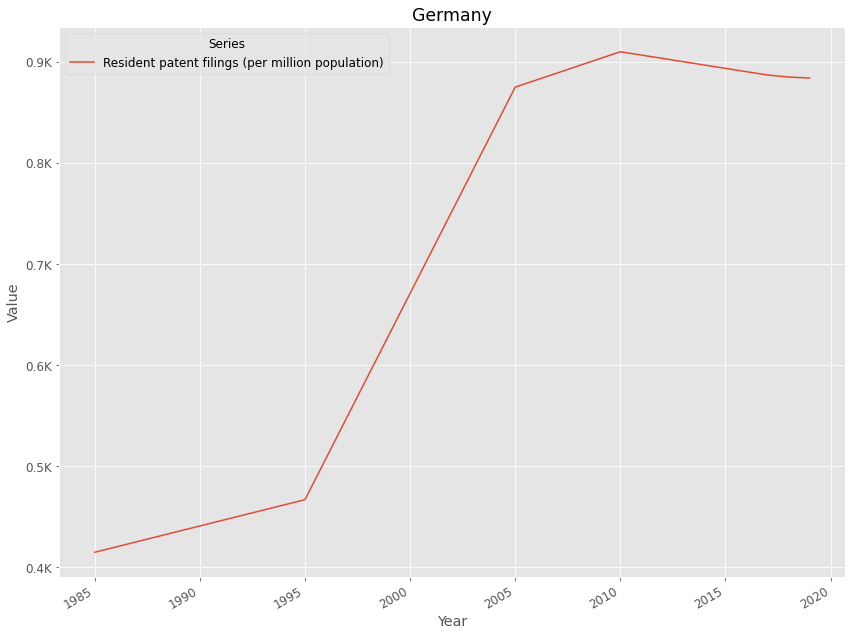

In [23]:
plot_line(
    data=df1_gprd.get_group(('Germany', 'Resident patent filings (per million population)')),
    x='Year', y='Value',
    hue='Series',
    title='Germany', xlabel='Year', ylabel='Value',
    formatter=format_tsd
)

# Patents in force exploration

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

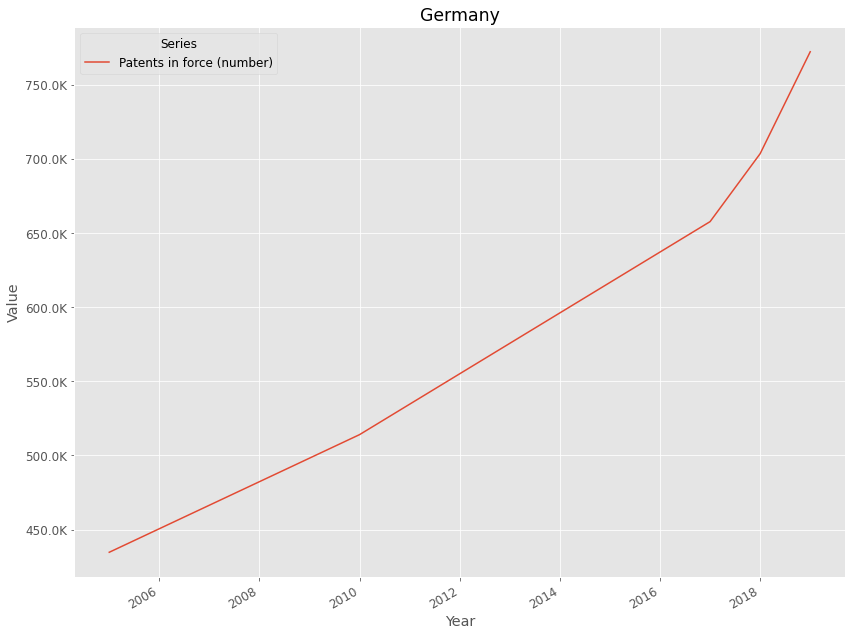

In [24]:
plot_line(
    data=df1_gprd.get_group(('Germany', 'Patents in force (number)')),
    x='Year', y='Value',
    hue='Series',
    title='Germany', xlabel='Year', ylabel='Value',
    formatter=format_tsd
)